# D207 - Data Exploration Performance Assessment 
Aidan Soares, 012042436, Western Governors University

### A1: Question for Analysis
For this assessment I will be using the Cleaned Churn dataset to solve the question "What factors influence the customer churn rate?"\
Analysis for this question will be conducted through a chi-squared test as I will be performing analysis on two categorical variables.

### A2: Organizational Benefit
For a highly competitive environment, customer churn is a significantly important problem for telecommunications companies to solve. Should a customer feel that they are no longer satisfied with their current provider, they can cancel service and switch to another with just a simple phone call. The presence of quick turnover threatens market capitalization as well as profitability, thus it is very important that stakeholders focus on the identification of factors that influence the customer churn rate so that customer retention can be bolstered. By conducting analysis for statistical relevance between existing observed variables such as survey data and customer churn rate, connections can be made to recognize areas in need of improvement relating to customer support or service quality.

### A3: Data Required
For this performance assessment I will be using two variables.
- Customer churn rate: This column contains categorical nominal data in a binary Yes/No format, indicating if the customer identified has dropped service with the telecom company within the current month.
- Item4: This column contains categorical ordinal data for survey responses customers provided to indicate the importance of the telecommunication company's reliability. The data collected ranges in integers demonstrating importance on a scale of 1(most important) to 8(least important).

### B1: Code for Chi-Squared Test
The chi-squared test I will be using for this assessment is the Test For Independence between the two columns selected above. As such, I am looking to identify if my null hypothesis "There is no association between these two variables" can be rejected with an alpha value of 0.05.

In [75]:
#Importing the necessary libraries and data from churn_clean.csv
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("churn_clean.csv", index_col=0)

In [76]:
#renaming column 'item4' to 'relability' for better clarity and readability
df.rename(columns={"Item4" : "reliability"}, inplace=True)

In [77]:
#creating a crosstabulation table of the two columns selected
#crosstab code learned from Pandas documentation (NumFOCUS Inc., 2024)
ctb = pd.crosstab(df["Churn"], df["reliability"])
ctb

reliability,1,2,3,4,5,6,7
Churn,,,,,,,
No,162,990,2524,2523,998,145,8
Yes,59,360,906,929,337,58,1


### B2: Output from Calculation Code

In [78]:
#determining the chi-squared value and P value for variables selected
#calculation code for determining chi-squared value and P value learned from Scipy documentation (The Scipy Community, 2024)
print("The Chi-Squared value for these two variables is " + str(stats.chi2_contingency(ctb)[0]) + 
      " , the P-Value is " + str(stats.chi2_contingency(ctb)[1]))

The Chi-Squared value for these two variables is 2.961094770597157 , the P-Value is 0.8137137824222062


As can be seen from the above outputs, the p-value determined for the test of independence between the customer churn and the importance of reliability for the telecommunications company is approximately 0.81. This value indicates the likelihood of the null hypothesis ("there is no association between these two variables) being true. I have established an alpha of 0.05, a p-value less than that would indicate with a 95% level of confidence that the association between the variables chosen is significant and the null hypothesis can be rejected. However, as the p-value of 0.81 is much higher than the alpha, we must conclude that the null hypothesis is correct, and that there is no statistical significance demonstration an association between the customer churn and the importance of reliability to the customer.

### B3: Justification
For this assessment I have chosen to utilize the chi-squared test in analysing the statistical significance that reliability has on customer churn due to the data being dealt with. Both columns demonstrate data that are categorical in nature. As mentioned above, the customer churn column contains customer status in binary format, categorized as either "Yes", for those that dropped service within the month or "No", for those that stayed customers. My second choice, reliability, denotes categorical responses in an ordinal format, providing customer responses to a survey in numerical format scored by importance. Going further, trying to idenitfy the relationship between these two variables is best conducted through the test for independence: a test that would identify if two categorical variables demonstrated a statistically significant relationship to each other. 

### C: Univariate Statistics

Continuous variables selected:
- Income
- Customer tenure

Categorical variables selected:
- Payment Method
- Internet service

Distribution (shown visually in section C1):
- **Income:** As per the histogram for the income column, the data presents a right-skew as the tail extends strongly to the right.
- **Customer tenure:** The historgram demonstrates a bimodal distribution as there are two peaks within the data.
- **Payment Method:** The distribution between customers who opted for Credit card, Bank transfer, and mailed check, are all fairly even, each representing about 20% of the market base, electronic check appears to be the most popular form of payment method, as a distribution of 34% of all customers have opted to use this payment method.
- **Internet service:** The bar chart indicates the distribution in popularity for each internet service type with Fiber Optic seeing the most popularity in selection at 4408 customers, DSL being the next most popular with 3463 customers, and None being the least popular selection with 2129 customers. All in all, the data indicates the strongest distribution of customers within Fiber Optic.

### C1: Visual Representation

Text(0.5, 0.98, 'Distribution of Tenure')

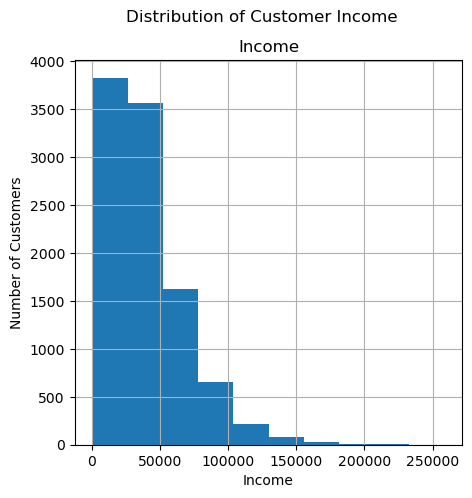

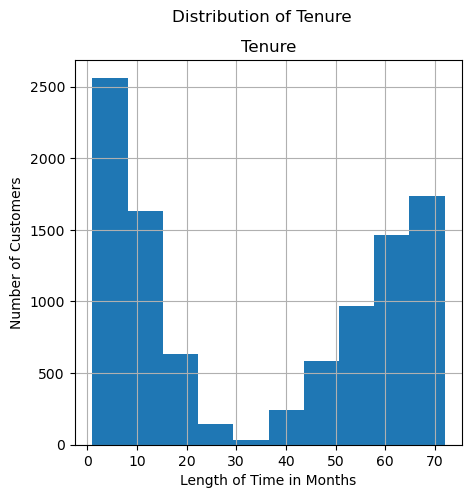

In [79]:
#graphing the continuous variables in histograms
df.hist(column=["Income"], figsize=(5,5))
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.suptitle("Distribution of Customer Income")

df.hist(column=[ "Tenure"], figsize=(5,5))
plt.xlabel('Length of Time in Months')
plt.ylabel('Number of Customers')
plt.suptitle("Distribution of Tenure")

In [80]:
#returning statistical data from the income column
df["Income"].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [81]:
#returning statistical data from the tenure column
df["Tenure"].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

Axes(0.22375,0.11;0.5775x0.77)


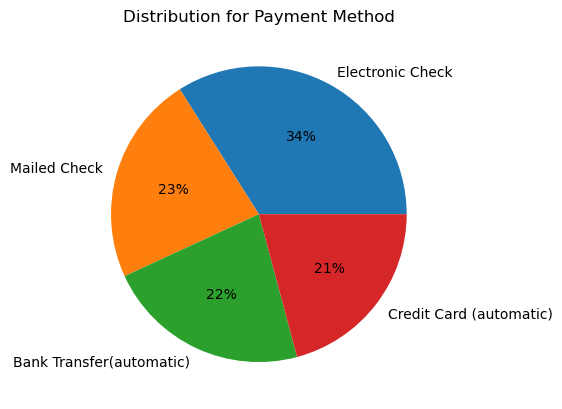

In [82]:
#graphing the categorical variables as a pie chart and a bar chart
print(df["PaymentMethod"].value_counts().plot.pie(autopct='%1.0f%%', title = "Distribution for Payment Method", ylabel=""))

In [83]:
#printing total value counts from the paymentmethod column
df["PaymentMethod"].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

Axes(0.125,0.11;0.775x0.77)


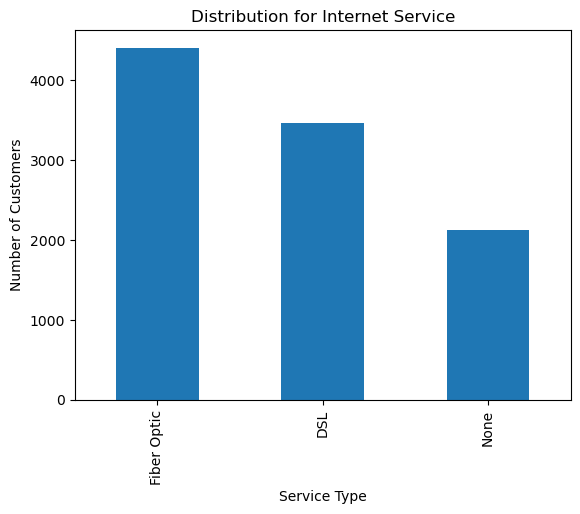

In [84]:
print(df["InternetService"].value_counts().plot(
    kind="bar", title="Distribution for Internet Service", ylabel="Number of Customers",xlabel="Service Type"))

In [85]:
#printing total value counts from the internetservice column
df["InternetService"].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

### D: Bivariate Statistics

Continuous variables selected:
- Age
- Children

Categorical variables selected:
- Contract
- TechSupport

Distribution discussion (as shown visually in section D1)
- **Number of Children by Age of Customer:** From the scatterplot generated below, there is not a readily apparent relationship demonstrated between the age of the customer and their number of children. Instead, the data presents a fairly uniform distribution of children at every age within the dataset, further supported by the crosstab associated with my analysis.
- **Number of Customers who bought Tech Support per Contract Type:** From the bar graph below it is apparent that the number of customers that have not opted for the tech support package has a higher distribution than those that have, but looking at the distribution from a bivariate standpoint, the trend in contract type selection is mirrored between those that have tech support and those that do not. Month-to-month is the most popular contract across both groups, followed by two year contracts, with the least popular contract type being one year contracts. This implies that the contract chosen by the customer does not influence their decision to buy tech support, and vice versa.
- **Number of Children by Contract Type:** The multiple boxplot diagram demonstrates the distribution in number of children to be the exact same across customers having one year contracts and month-to-month contracts. Interestingly, the boxplot for customers with the two year contracts has a different distribution from the other two as it has a slightly less positive skew, indicating a higher median number of children at 2 rather than 1, and a lower maximum before the outliers.

### D1: Visual Representation

<Axes: title={'center': 'Number of Children by Age of Customer'}, xlabel='Age', ylabel='Children'>

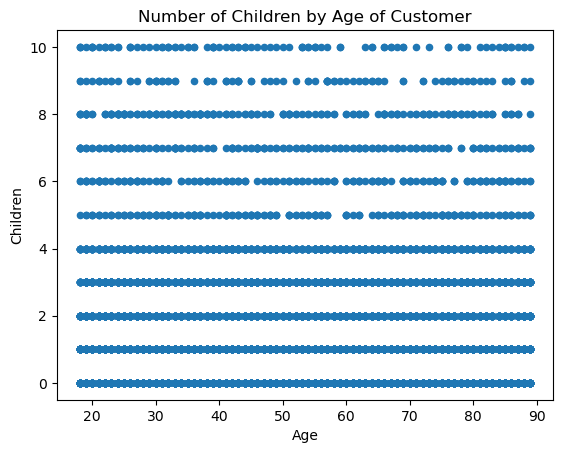

In [86]:
#creating a scatterplot to represent the distribution of number of children by age
df.plot.scatter(x="Age",y="Children",title="Number of Children by Age of Customer")

In [87]:
#creating a crosstabulation table of the two columns selected
pd.crosstab(df["Age"], df["Children"])

Children,0,1,2,3,4,...,6,7,8,9,10
Age,,,,,,,,,,,
18,39,34,18,8,8,...,2,7,4,2,3
19,37,30,20,34,13,...,5,3,8,1,1
20,33,35,20,18,10,...,2,2,2,1,4
21,29,32,22,23,12,...,8,3,0,3,1
22,41,35,23,20,13,...,3,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...
85,39,29,13,24,10,...,6,2,2,1,4
86,38,41,15,12,9,...,2,2,3,3,2
87,39,29,15,17,13,...,2,4,3,0,1


<Axes: title={'center': 'Distribution of Customers who Bought Tech Support per Contract Type'}, xlabel='Contract Type', ylabel='Number of Customers'>

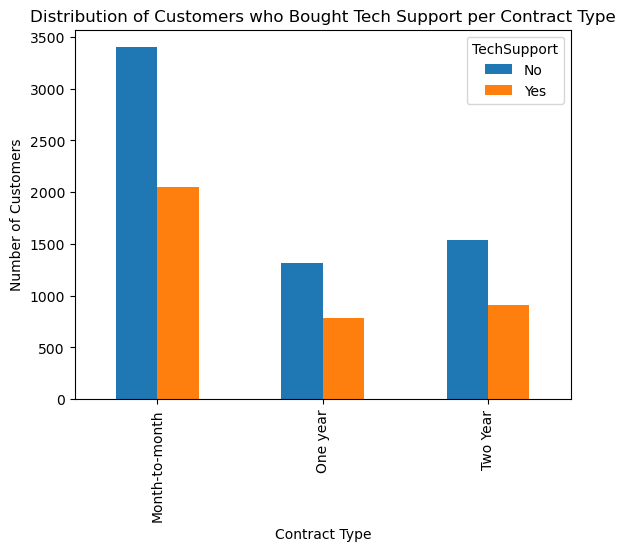

In [88]:
#creating a barchart to represent the distribution of customers who bought tech support per each contract type
pd.crosstab(df["Contract"],df["TechSupport"]).plot(
    kind="bar",title="Distribution of Customers who Bought Tech Support per Contract Type",ylabel="Number of Customers",xlabel="Contract Type")

In [89]:
#creating a crosstabulation table of the two columns selected
pd.crosstab(df["Contract"], df["TechSupport"])

TechSupport,No,Yes
Contract,,
Month-to-month,3401,2055
One year,1315,787
Two Year,1534,908


Text(0.5, 1.0, 'Relationship of Number of Children by Contract Type')

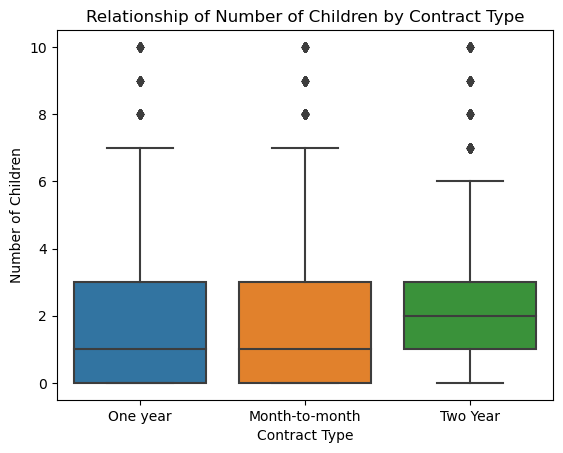

In [90]:
#Creating a set of boxplots to represent the distribution between a continuous variable (Children), and a categorical variable (Contract type)
sns.boxplot(data=df, x="Contract", y="Children")
plt.xlabel("Contract Type")
plt.ylabel("Number of Children")
plt.title("Relationship of Number of Children by Contract Type")

In [91]:
#creating a crosstabulation table of the two columns selected
pd.crosstab(df["Contract"], df["Children"])

Children,0,1,2,3,4,5,6,7,8,9,10
Contract,,,,,,,,,,,
Month-to-month,1444,1328,816,833,529,122,99,78,111,44,52
One year,540,518,318,283,211,50,44,44,50,22,22
Two Year,586,626,361,356,266,40,44,63,49,26,25


### E1:Hypothesis Test Results (Chi Square test for independence)
As stated above the alpha value of 0.05. When comparing to the calculated p-value of 0.81, it exceeds the alpha, meaning that there is no statistical significance demonstrating a relationship between the importance of reliability and the customer churn. Therefore, we do not reject the null hypothesis and we cannot conclude that the reliability influences the customer churn rate.

### E2: Limitations
From the dataset within the churn csv file provided, there were only 10,000 entries available for analysis. For telecommunications companies, customer count can be in the range of hundreds of thousands of people, and the amount of data used for my analysis may not have been a suitable sample size to conduct the hypothesis testing on. Furthermore, the information being utilized to conduct the analysis is not necessarily the most appropriate to identify a controllable category for the telecom company. Per the data dictionary, the 'reliability' category is a measure of how important a customer finds service reliability. However, this value does not represent the actual level quality the customer feels that they are receiving. It is possible that a survey asking customers to rate the actual reliability of their telecom service may result in vastly different data from the information being used from the 'reliability' column given with the current dataset, which may lead to a different result in hypothesis testing.

### E3: Course of Action
The question posed at the beginning of this assessment still poses significant relevance to all telecommunications companies and should be pursued for a focus on better customer retention. While my analysis did not result in a conclusion supporting a correlation between the importance of reliability and customer churn, further analysis can be conducted on the other variables within this dataset to identify any other existing correlations to the customer churn column. Furthermore, I would recommend capturing a greater range of data for a more accurate assessment in hypothesis testing to resolve this problem. They should expand their surveys to capture additional information such as customer-based ratings for the quality of service, reliability, etc... to increase the variables available, and they should also capture more rows of consumer data to increase the sample size.

### F: Video
Panopto video link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=d8398362-6b07-4e98-9ba0-b13201816204

### G: Third-Party Code Sources
NumFOCUS, Inc. Pandas Documentation Version 2.2.1. Feb 23, 2024. Available at https://pandas.pydata.org/pandas-docs/stable/index.html
\
The Scipy Community. Scipy v1.12.0 Manual. January 20, 2024. Available at https://docs.scipy.org/doc/scipy/index.html

### H: Sources
No additional external sources were required for this performance assessment.